In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/ERA V2')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Import the required modules
import matplotlib.pyplot as plt
import torch
import model
import utils

In [3]:
# Check GPU availability (if needed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Load train and test data loaders
train_loader, test_loader = utils.load_mnist_data()

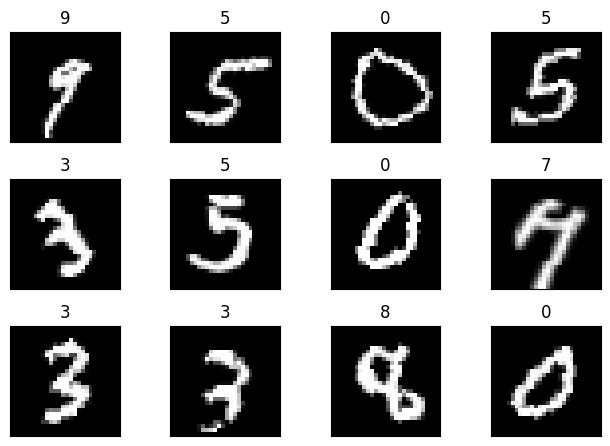

In [5]:
utils.visualise_input(train_loader)

CODE BLOCK: 3

In [6]:
# Create the model and optimizer
model_ = model.Network().to(device)
optimizer = torch.optim.Adam(model_.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

CODE BLOCK: 4

In [7]:
#!pip install torchsummary
from torchsummary import summary
summary(model_, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:
import torch.nn.functional as F

In [12]:
model_1 = model.Network().to(device)
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 5

Adjusting learning rate of group 0 to 1.0000e-02.


In [13]:
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model_1, device, train_loader, optimizer,criterion)
  # test(model, device, train_loader)
  utils.test(model_1, device, test_loader,criterion)
  scheduler.step()

Epoch 1


Train: Loss=0.8070 Batch_id=117 Accuracy=35.01: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.4788, Accuracy: 8578/10000 (85.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1586 Batch_id=117 Accuracy=91.39: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.1040, Accuracy: 9665/10000 (96.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0818 Batch_id=117 Accuracy=95.70: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]


Test set: Average loss: 0.0855, Accuracy: 9715/10000 (97.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1127 Batch_id=117 Accuracy=96.66: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0560, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0642 Batch_id=117 Accuracy=97.19: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]


Test set: Average loss: 0.0460, Accuracy: 9840/10000 (98.40%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

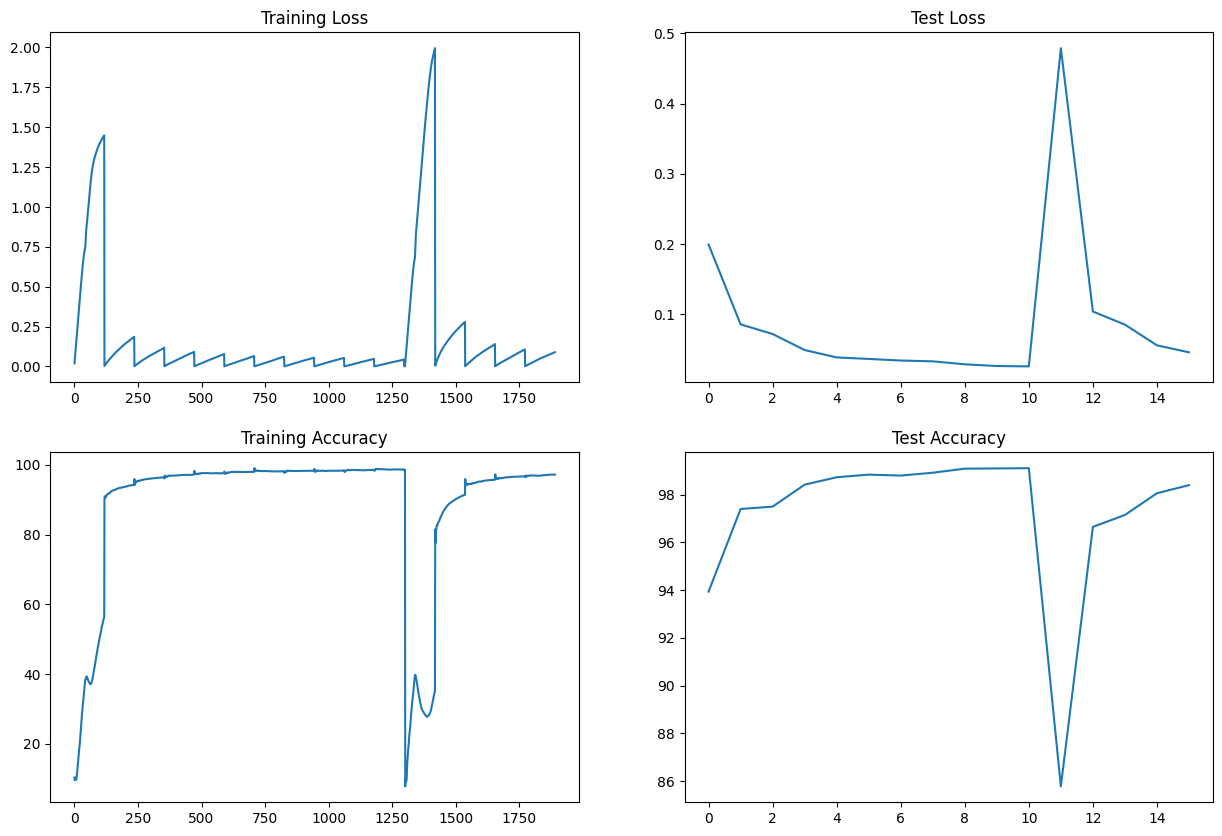

In [18]:

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(utils.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(utils.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(utils.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(utils.test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))